# 2021 2학기 HCI - 표정 인식 실습 패키지
# 01. 데이터 추출

### #1. 모듈 선언

In [5]:
from libs.Face import FacialLandmarkDetector
import libs.Face as Face
import cv2

facial_landmark_detector = FacialLandmarkDetector(
        model=Face.FACIAL_LANDMARK_DETECTION_MODEL_MEDIAPIPE,
        face_detector=Face.FACE_DETECTION_MODEL_OPENCV_DNN)

### #2. 얼굴 검출하기
먼저 이미지를 불러온다.

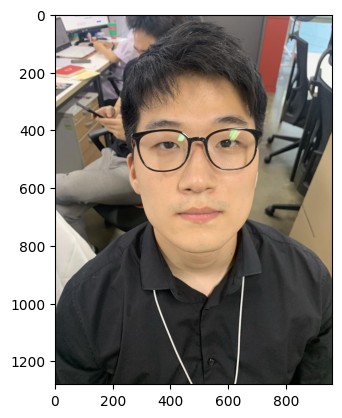

In [6]:
from matplotlib.pyplot import imshow

# 경로 상의 이미지를 읽어오기
img = cv2.imread("./datasets/neutral/appletree_open_neutral_01_210719.jpg")

# 이미지 사이즈를 조정 가로 480, 세로 640
img = cv2.resize(img, (960, 1280))

# RGB 이미지로 변환
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 출력
imshow(rgb_img)

feed 함수를 이용하여 이미지를 모듈에 입력으로 넣는다.

동작 결과는 getFace() 함수를 통해 받을 수 있다. (Face 객체 구성: x, y, w, h) 

In [7]:
# feed(img): 이미지(BGR 형식)를 입력받아 얼굴 검출 및 얼굴 특징점을 검출한다.

facial_landmark_detector.feed(img)

In [8]:
# getIsDetect(): 얼굴 검출 여부를 확인하는 함수. 얼굴이 검출되면 True를, 아니면 False를 반환함.
if facial_landmark_detector.getIsDetect():
    
    # getFace(): 검출된 얼굴 영역을 반환하는 함수. 얼굴 영역은 Face 객체로 반환된다.
    roi = facial_landmark_detector.getFace()
    
    # Face(x. y. w. h) 객체 : x, y, w, h 4가지 값으로 이루어져 있다.
    # x : 얼굴 영역의 좌측 상단 x 좌표
    # y : 얼굴 영역의 좌측 상단 y 좌표
    # w : 얼굴 영역의 가로 길이
    # h : 얼굴 영역의 세로 길이
    # 각각의 값은 getX(). getY(), getW(), getH() 함수로 반환받을 수 있다.

    # 검출된 얼굴 영역 박스 그리기
    cv2.rectangle(rgb_img, (roi.getX(), roi.getY()), (roi.getX()+roi.getW(), roi.getY()+roi.getH()), (0, 255, 0), 3)
    
    # 이미지 출력
    imshow(rgb_img)

AttributeError: 'NoneType' object has no attribute 'getX'

### #3. 얼굴 특징점 검출하기

먼저 얼굴만 크롭한다.

In [ ]:
# getIsDetect(): 얼굴 검출 여부를 확인하는 함수. 얼굴이 검출되면 True를, 아니면 False를 반환함.
if facial_landmark_detector.getIsDetect():
    
    # getFacialLandmark(): 검출된 얼굴 특징점을 반환하는 함수. 얼굴 영역은 FacialLandmark 객체로 반환된다.
    landmarks = facial_landmark_detector.getFacialLandmark()
    
    # FacialLandmark(x. y) 객체 : x, y 2가지 배열로 이루어져 있다.
    # x : 얼굴 특징점의 x 좌표 리스트
    # y : 얼굴 특징점의 y 좌표 리스트
    # 각각의 리스트는 getX(). getY() 함수로 반환받을 수 있다.
    x = landmarks.getX() 
    y = landmarks.getY()
    
    # 검출된 얼굴 특징점 그리기
    for i in range(landmarks.size):
        cv2.circle(rgb_img, (int(x[i]), int(y[i])), 1, (255, 255, 0), 3)
    
    # 이미지 출력
    imshow(rgb_img)

이렇게 추출된 얼굴 특징점 데이터를 이용하여 표정을 인식하기 위한 룰을 세울 수 있다.